### import necessary libraries

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
lable=KMeans
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hierar
import seaborn as sns

### Load data from an Excel file

In [2]:
df_Customer_sales=pd.read_excel('RFM.xlsx')

In [3]:
df_Customer_sales.head()

,CustomerCode,CreatedDate,QtyFinal,orderIncrementId,SaleAmount,productdiversity
0,5209875,2023-05-16,19,648825.0,3000618.4,13
1,5209932,2022-07-30,4,593721.0,1201646.0,44
2,5209932,2022-08-17,4,595165.0,1189296.0,44
3,5209932,2022-05-05,2,585977.0,1408396.0,44
4,5209932,2022-05-04,3,585909.0,1193396.0,44


### Remove row with missing CustomerCode

In [4]:
df_Customer_sales.dropna(subset=['CustomerCode'],how='all',inplace=True)
df_Customer_sales.shape

(57310, 6)

### Check data type and null values

In [5]:
df_Customer_sales.dtypes

CustomerCode                 int64
CreatedDate         datetime64[ns]
QtyFinal                     int64
orderIncrementId           float64
SaleAmount                 float64
productdiversity             int64
dtype: object

In [6]:
df_Customer_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57310 entries, 0 to 57309
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerCode      57310 non-null  int64         
 1   CreatedDate       57310 non-null  datetime64[ns]
 2   QtyFinal          57310 non-null  int64         
 3   orderIncrementId  56777 non-null  float64       
 4   SaleAmount        57310 non-null  float64       
 5   productdiversity  57310 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 2.6 MB


In [7]:
df_Customer_sales.isnull().sum().sort_values(ascending=False)

orderIncrementId    533
CustomerCode          0
CreatedDate           0
QtyFinal              0
SaleAmount            0
productdiversity      0
dtype: int64

### Filter data base on quantity and sale amount

In [8]:
df_Customer_sales = df_Customer_sales[(df_Customer_sales['QtyFinal']>0) & (df_Customer_sales['SaleAmount']>0)] 
df_Customer_sales.describe()

,CustomerCode,QtyFinal,orderIncrementId,SaleAmount,productdiversity
count,5.731000e+04,57310.000000,56777.000000,5.731000e+04,57310.000000
mean,5.363085e+06,6.147322,604878.829420,1.617196e+06,52.032682
std,6.274433e+04,217.612785,33427.532137,1.777486e+06,176.961383
min,5.209875e+06,1.000000,548779.000000,1.049396e+06,1.000000
25%,5.333035e+06,2.000000,575113.000000,1.253832e+06,2.000000
50%,5.380286e+06,3.000000,604558.000000,1.399396e+06,7.000000
75%,5.404716e+06,5.000000,633743.000000,1.647971e+06,29.000000
max,5.451709e+06,52001.000000,662666.000000,1.382334e+08,1487.000000


### Remove duplicate row 

In [9]:
df_Customer_sales=df_Customer_sales.drop_duplicates()
df_Customer_sales.shape

(57310, 6)

In [10]:
print(df_Customer_sales['CreatedDate'].min(),df_Customer_sales['CreatedDate'].max())

2021-04-06 00:00:00 2023-07-16 00:00:00


In [11]:
today = date.today()
print("Today's date:", today)

Today's date: 2023-10-17


### Convert  'CreatedDate' into datetime

In [12]:
In [32]: df_Customer_sales['CreatedDate'] = df_Customer_sales['CreatedDate'].astype('datetime64[ns]')
df_Customer_sales

,CustomerCode,CreatedDate,QtyFinal,orderIncrementId,SaleAmount,productdiversity
0,5209875,2023-05-16,19,648825.0,3000618.4,13
1,5209932,2022-07-30,4,593721.0,1201646.0,44
2,5209932,2022-08-17,4,595165.0,1189296.0,44
3,5209932,2022-05-05,2,585977.0,1408396.0,44
4,5209932,2022-05-04,3,585909.0,1193396.0,44
...,...,...,...,...,...,...
57305,5451672,2023-07-16,2,662657.0,1734396.0,1
57306,5451684,2023-07-16,4,662651.0,1682946.0,3
57307,5451690,2023-07-16,2,662662.0,1114296.0,1
57308,5451690,2023-07-16,2,662659.0,1114296.0,1


In [13]:
print(type(today))
print(type(df_Customer_sales['CreatedDate']))

<class 'datetime.date'>
<class 'pandas.core.series.Series'>


### Calculate reecency as the difference between today and 'CreateDate'

In [14]:
df_Customer_sales['history_day']=pd.to_datetime(today)- df_Customer_sales['CreatedDate']
df_Customer_sales['history_day'].astype('timedelta64[D]')
df_Customer_sales['history_day']=df_Customer_sales['history_day'] / np.timedelta64(1, 'D')
df_Customer_sales.head()

,CustomerCode,CreatedDate,QtyFinal,orderIncrementId,SaleAmount,productdiversity,history_day
0,5209875,2023-05-16,19,648825.0,3000618.4,13,154.0
1,5209932,2022-07-30,4,593721.0,1201646.0,44,444.0
2,5209932,2022-08-17,4,595165.0,1189296.0,44,426.0
3,5209932,2022-05-05,2,585977.0,1408396.0,44,530.0
4,5209932,2022-05-04,3,585909.0,1193396.0,44,531.0


In [15]:
In [28]: df_Customer_sales['CreatedDate'].astype('datetime64[D]').tolist()

[Timestamp('2023-05-16 00:00:00'),
 Timestamp('2022-07-30 00:00:00'),
 Timestamp('2022-08-17 00:00:00'),
 Timestamp('2022-05-05 00:00:00'),
 Timestamp('2022-05-04 00:00:00'),
 Timestamp('2022-08-06 00:00:00'),
 Timestamp('2022-06-29 00:00:00'),
 Timestamp('2022-08-05 00:00:00'),
 Timestamp('2022-05-04 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-06-02 00:00:00'),
 Timestamp('2022-03-13 00:00:00'),
 Timestamp('2022-07-20 00:00:00'),
 Timestamp('2022-07-15 00:00:00'),
 Timestamp('2022-09-04 00:00:00'),
 Timestamp('2022-05-13 00:00:00'),
 Timestamp('2022-02-10 00:00:00'),
 Timestamp('2023-07-15 00:00:00'),
 Timestamp('2022-07-05 00:00:00'),
 Timestamp('2022-09-17 00:00:00'),
 Timestamp('2022-03-11 00:00:00'),
 Timestamp('2021-11-12 00:00:00'),
 Timestamp('2021-12-10 00:00:00'),
 Timestamp('2023-05-22 00:00:00'),
 Timestamp('2023-05-04 00:00:00'),
 Timestamp('2021-11-13 00:00:00'),
 Timestamp('2023-05-18 00:00:00'),
 Timestamp('2023-04-

### Group data by 'CustomerCode' and aggregate RFM metric

In [16]:
df_RFM =df_Customer_sales.groupby('CustomerCode').agg({'CustomerCode': lambda x:x.min() ,
                                           'history_day': lambda x:x.min() , # Recency
                                           'orderIncrementId': lambda x: len(x) ,# Frequency تعداد دفعات خريد
                                           'SaleAmount': lambda x: x.sum() , #Monetary Value
                                           'productdiversity' : lambda x: x.max()})#

### Rename column for clarity

In [17]:
df_RFM.rename(columns={'CustomerCode':'CustomerCode',
                         'history_day': 'recency', 
                         'orderIncrementId': 'frequency', 
                         'SaleAmount': 'monetary_value',
                         'productdiversity' : 'Productdiversity'
}, inplace=True)
df_RFM

,CustomerCode,recency,frequency,monetary_value,Productdiversity
CustomerCode,,,,,
5209875,5209875,154.0,1,3.000618e+06,13
5209932,5209932,408.0,16,8.004693e+07,44
5209935,5209935,614.0,1,1.489396e+06,2
5209949,5209949,94.0,259,4.839483e+08,499
5209954,5209954,207.0,7,1.000590e+07,12
...,...,...,...,...,...
5451665,5451665,93.0,1,2.000696e+06,1
5451672,5451672,93.0,1,1.734396e+06,1
5451684,5451684,93.0,1,1.682946e+06,3


### Calculate quartiles for further analytic

In [18]:
quartiles = df_RFM.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      CustomerCode  recency  frequency  monetary_value  Productdiversity
0.25    5374749.75    193.0        1.0       1289396.0               1.0
0.50    5391138.50    310.0        1.0       1530471.0               3.0
0.75    5414764.75    564.0        1.0       2568890.5               6.0 <class 'pandas.core.frame.DataFrame'>


In [19]:
quartiles=quartiles.to_dict()
quartiles

{'CustomerCode': {0.25: 5374749.75, 0.5: 5391138.5, 0.75: 5414764.75},
 'recency': {0.25: 193.0, 0.5: 310.0, 0.75: 564.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary_value': {0.25: 1289396.0, 0.5: 1530471.0, 0.75: 2568890.5},
 'Productdiversity': {0.25: 1.0, 0.5: 3.0, 0.75: 6.0}}

### Define the RClass function to categorize Recency (R) and Define FMDClass function to categorize Frequency and Monetary Value(F and M)

In [20]:
def RClass(x,p,d):

    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# for Frequency and Monetary value 

def FMDClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

### Create an 'RFMClass' column by combining R, F, and M quartiles

In [21]:
RFM_Segmentation = df_RFM
RFM_Segmentation['R_Quartile'] = RFM_Segmentation['recency'].apply(RClass, args=('recency',quartiles,))
RFM_Segmentation['F_Quartile'] = RFM_Segmentation['frequency'].apply(FMDClass, args=('frequency',quartiles,))
RFM_Segmentation['M_Quartile'] = RFM_Segmentation['monetary_value'].apply(FMDClass, args=('monetary_value',quartiles,))
RFM_Segmentation['Productdiversity']  = RFM_Segmentation['Productdiversity'].apply(FMDClass, args=('Productdiversity',quartiles,))

In [22]:
RFM_Segmentation

,CustomerCode,recency,frequency,monetary_value,Productdiversity,R_Quartile,F_Quartile,M_Quartile
CustomerCode,,,,,,,,
5209875,5209875,154.0,1,3.000618e+06,1,1,4,1
5209932,5209932,408.0,16,8.004693e+07,1,3,1,1
5209935,5209935,614.0,1,1.489396e+06,3,4,4,3
5209949,5209949,94.0,259,4.839483e+08,1,1,1,1
5209954,5209954,207.0,7,1.000590e+07,1,2,1,1
...,...,...,...,...,...,...,...,...
5451665,5451665,93.0,1,2.000696e+06,4,1,4,2
5451672,5451672,93.0,1,1.734396e+06,4,1,4,2
5451684,5451684,93.0,1,1.682946e+06,3,1,4,2


In [23]:
RFM_Segmentation['RFMClass'] = RFM_Segmentation.R_Quartile.map(str) \
                     + RFM_Segmentation.F_Quartile.map(str) \
                     + RFM_Segmentation.M_Quartile.map(str) \
#                      + rfmSeg.Productdiversity.map(str)

In [24]:
RFM_Segmentation.head(2)

,CustomerCode,recency,frequency,monetary_value,Productdiversity,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerCode,,,,,,,,,
5209875,5209875,154.0,1,3000618.4,1,1,4,1,141
5209932,5209932,408.0,16,80046926.0,1,3,1,1,311


### Sort the data base on RFMClass and monetary value

In [25]:
RFM_Segmentation.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,CustomerCode,recency,frequency,monetary_value,Productdiversity,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerCode,,,,,,,,,
5379404,5379404,93.0,716,1.158809e+09,1,1,1,1,111
5209949,5209949,94.0,259,4.839483e+08,1,1,1,1,111
5210492,5210492,136.0,10,2.819469e+08,1,1,1,1,111
5279643,5279643,94.0,156,2.001806e+08,1,1,1,1,111
5231136,5231136,102.0,142,1.920693e+08,1,1,1,1,111
...,...,...,...,...,...,...,...,...,...
5377131,5377131,725.0,1,1.049396e+06,4,4,4,4,444
5378214,5378214,682.0,1,1.049396e+06,4,4,4,4,444
5379435,5379435,657.0,1,1.049396e+06,3,4,4,4,444


### Calculate the count of each RFMClass

In [26]:
RFM_Segmentation.groupby('RFMClass').agg('F_Quartile').count()

RFMClass
111    2562
112      88
141     543
142    2274
143    1342
144    1023
211    1808
212     158
241     412
242    2054
243    1911
244    1418
311    1163
312     176
341     146
342    1667
343    2522
344    2056
411    1066
412     409
441      70
442     944
443    1942
444    3326
Name: F_Quartile, dtype: int64

### Calculate the total score by suming R, F, nad M quartiles

In [27]:
RFM_Segmentation['Total Score'] = RFM_Segmentation['R_Quartile'] + RFM_Segmentation['F_Quartile'] +RFM_Segmentation['M_Quartile']
RFM_Segmentation.head(2)

,CustomerCode,recency,frequency,monetary_value,Productdiversity,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
CustomerCode,,,,,,,,,,
5209875,5209875,154.0,1,3000618.4,1,1,4,1,141,6
5209932,5209932,408.0,16,80046926.0,1,3,1,1,311,5


### Calculate the mean product diversity for each total score and create  a bar plot

<AxesSubplot:xlabel='Total Score'>

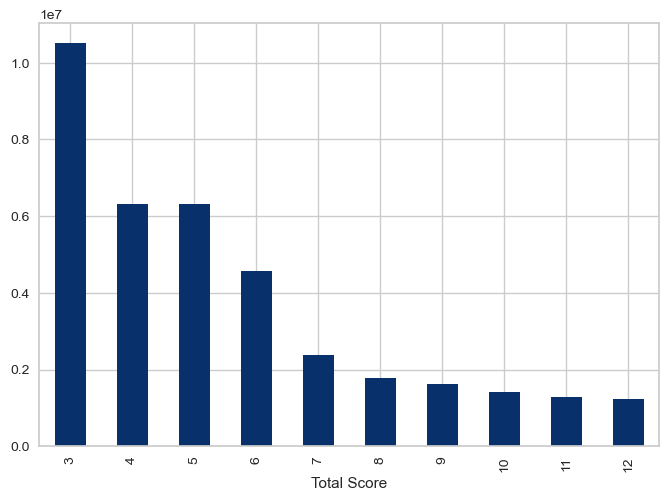

In [28]:
RFM_Segmentation.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')

<AxesSubplot:xlabel='Total Score'>

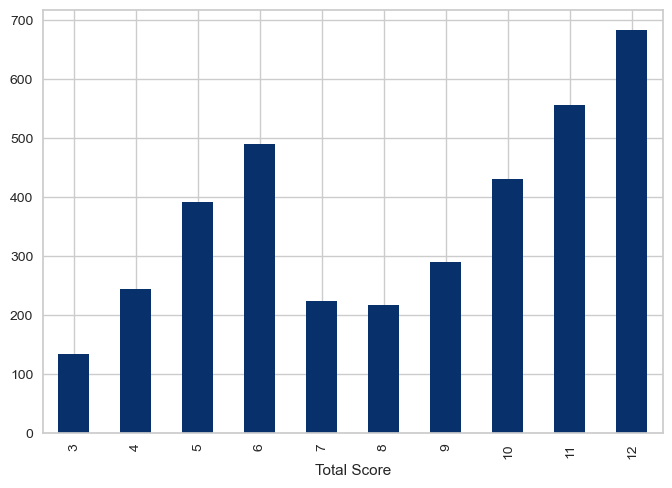

In [29]:
RFM_Segmentation.groupby('Total Score').agg('recency').mean().plot(kind='bar', colormap='Blues_r')

<AxesSubplot:xlabel='Total Score'>

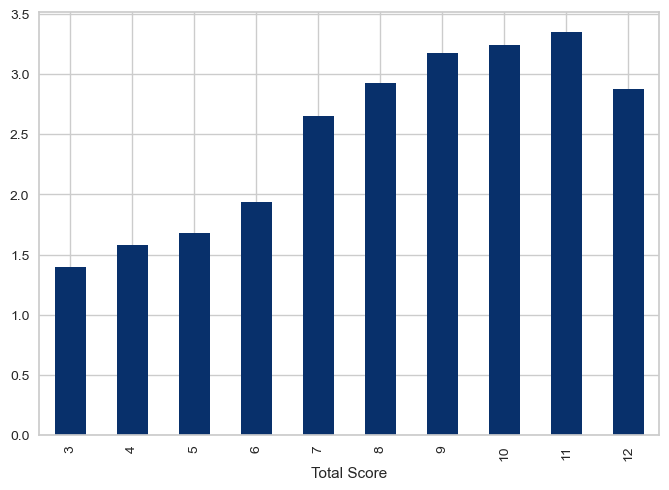

In [30]:
RFM_Segmentation.groupby('Total Score').agg('Productdiversity').mean().plot(kind='bar', colormap='Blues_r')

In [31]:
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['Total Score'], c=colors[n-1]) #clustered_df['recency'], 
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

In [32]:
RFM_Segmentation.iloc[5:,0:3]

,CustomerCode,recency,frequency
CustomerCode,,,
5209967,5209967,634.0,4
5209974,5209974,674.0,2
5209975,5209975,306.0,13
5209983,5209983,655.0,1
5209992,5209992,635.0,2
...,...,...,...
5451665,5451665,93.0,1
5451672,5451672,93.0,1
5451684,5451684,93.0,1


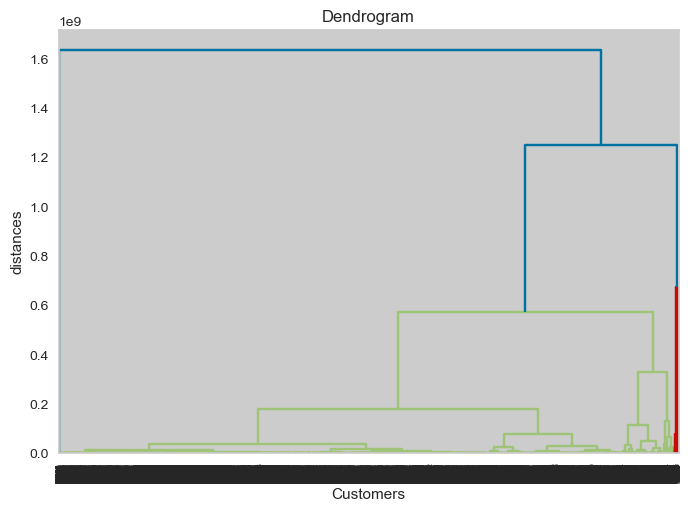

In [33]:
dendrogram = hierar.dendrogram(hierar.linkage(RFM_Segmentation.iloc[:,3:].values, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('distances')
plt.show()

### determine the optimal number of clusters using the Elbow method

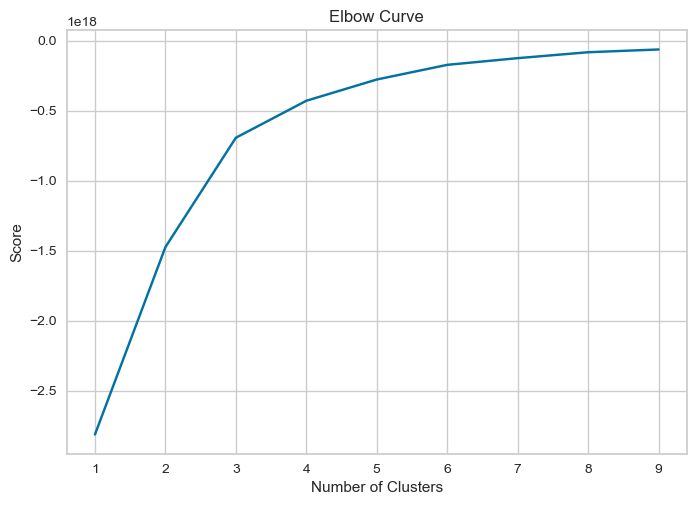

In [34]:
from sklearn.cluster import KMeans
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(RFM_Segmentation).score(RFM_Segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Perform KMeans clustering with 4clusters

In [35]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(RFM_Segmentation)

In [36]:
RFM_Segmentation['Cluster'] = kmeans.labels_
RFM_Segmentation

,CustomerCode,recency,frequency,monetary_value,Productdiversity,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,Cluster
CustomerCode,,,,,,,,,,,
5209875,5209875,154.0,1,3.000618e+06,1,1,4,1,141,6,1
5209932,5209932,408.0,16,8.004693e+07,1,3,1,1,311,5,3
5209935,5209935,614.0,1,1.489396e+06,3,4,4,3,443,11,1
5209949,5209949,94.0,259,4.839483e+08,1,1,1,1,111,3,3
5209954,5209954,207.0,7,1.000590e+07,1,2,1,1,211,4,1
...,...,...,...,...,...,...,...,...,...,...,...
5451665,5451665,93.0,1,2.000696e+06,4,1,4,2,142,7,1
5451672,5451672,93.0,1,1.734396e+06,4,1,4,2,142,7,1
5451684,5451684,93.0,1,1.682946e+06,3,1,4,2,142,7,1


In [37]:
print("Number of Cluster: ", RFM_Segmentation['Cluster'].nunique())

Number of Cluster:  4


In [38]:
RFM_Segmentation[RFM_Segmentation.Cluster == 0].head(10)

,CustomerCode,recency,frequency,monetary_value,Productdiversity,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,Cluster
CustomerCode,,,,,,,,,,,
5209967,5209967,634.0,4,56327584.0,2,4,1,1,411,6,0
5209975,5209975,306.0,13,16870048.0,1,2,1,1,211,4,0
5209997,5209997,626.0,24,30584315.0,1,4,1,1,411,6,0
5210057,5210057,536.0,27,33670729.8,1,3,1,1,311,5,0
5210224,5210224,439.0,10,20155010.0,1,3,1,1,311,5,0
5210459,5210459,353.0,14,22361455.9,1,3,1,1,311,5,0
5210475,5210475,221.0,17,23686332.0,1,2,1,1,211,4,0
5210605,5210605,373.0,3,20409788.0,1,3,1,1,311,5,0
5210765,5210765,111.0,16,20622236.0,1,1,1,1,111,3,0


### Create scatter plotsfor varous combinationof variabloes

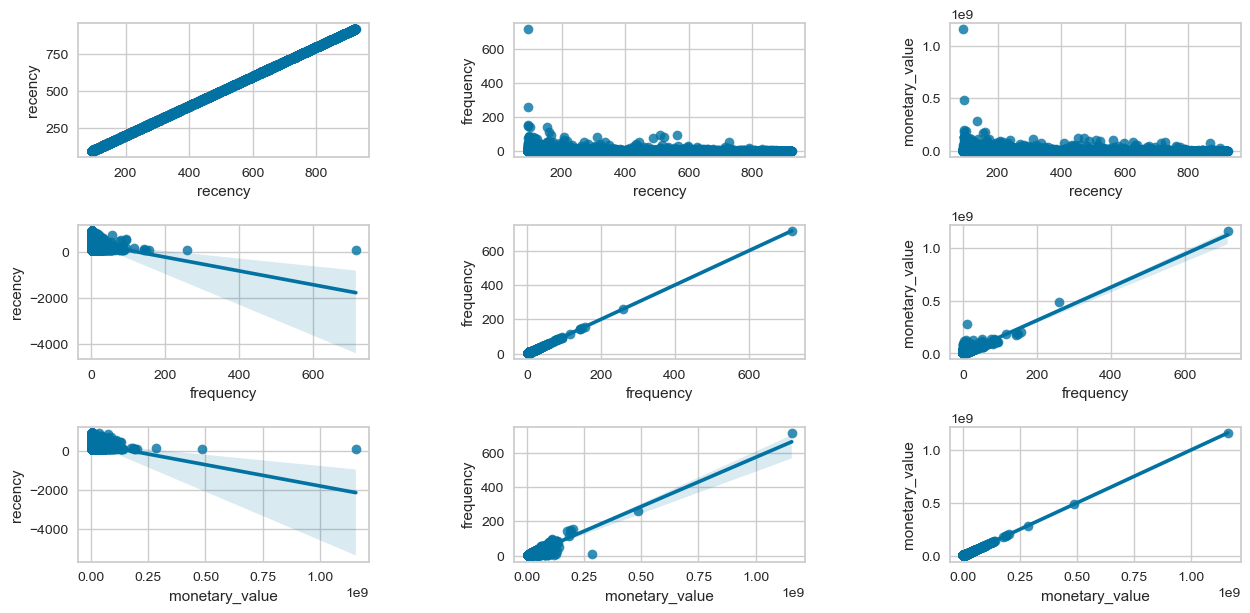

In [39]:
    plt.figure(1 , figsize = (15 , 7))
    n = 0 
    for x in ['recency' , 'frequency' , 'monetary_value']:
        for y in ['recency' , 'frequency' , 'monetary_value']:
            n += 1
            plt.subplot(3 , 3 , n)
            plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
            sns.regplot(x = x , y = y , data = RFM_Segmentation)
            plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
    plt.show()